<a href="https://colab.research.google.com/github/Haseeb55859/Artificial-intelligence-AI-/blob/main/NOTEBOOK/PHASE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use a clean mount point**

In [1]:
from google.colab import drive
drive.mount('/content/drive_fresh')


Mounted at /content/drive_fresh


**Set Dataset Paths (Skin Cancer 9-class)**

In [2]:
import os

# Base folder for skin cancer dataset
base_dir = "/content/drive_fresh/MyDrive/datasets/skin_cancer9"

print("Contents of base_dir:")
for f in os.listdir(base_dir):
    print(repr(f))   # repr() se spaces/special characters bhi clearly dikhenge


Contents of base_dir:
'train'
'test'
'val'
'manifest.csv'


**ImageDataGenerator**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Parameters ---
IMG_HEIGHT = 224
IMG_WIDTH  = 224
BATCH_SIZE = 32
SEED = 42

# --- Directories ---
train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")

# -------------------------------
# 1️⃣ Data generators

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Validation generator (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Test generator (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# -------------------------------
# 2️⃣ Create generators

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # MULTI-CLASS (9 classes)
    shuffle=True,
    seed=SEED
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)


Found 1907 images belonging to 9 classes.
Found 332 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


**Build CNN Model for 9-class Skin Cancer Dataset**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# -------------------------------
# Build Medium CNN for 9 classes
def build_skin_cnn(input_shape=(224,224,3), num_classes=9):
    model = Sequential([

        # Block 1
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        # Block 2
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        # Block 3
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        # Block 4 (optional deeper)
        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        # Dense layers
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')  # Multi-class output
    ])
    return model

# -------------------------------
# Create model
model = build_skin_cnn()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,237,961 (50.50 MB)

 Trainable params: 13,237,001 (50.50 MB)

 Non-trainable params: 960 (3.75 KB)

**Compile Model**

In [6]:
from tensorflow.keras.optimizers import Adam

# -------------------------------
# STEP 5 — Compile Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # 9-class classification
    metrics=['accuracy']
)

print("Model compiled successfully.")


Model compiled successfully.


**CallBacks**

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

# Checkpoint path (model save hoga yaha)
checkpoint_path = "/content/drive_fresh/MyDrive/skin_cancer_models/best_skin_cnn.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-7)
]

print("Callbacks ready. Model checkpoint path:", checkpoint_path)


Callbacks ready. Model checkpoint path: /content/drive_fresh/MyDrive/skin_cancer_models/best_skin_cnn.h5


** Training Model**

In [8]:
# -------------------------------
# STEP 7 — Train the model

EPOCHS = 50  # aap 50 epochs rakh sakte ho

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.2695 - loss: 3.1320 

60/60 ━━━━━━━━━━━━━━━━━━━━ 1468s 24s/step - accuracy: 0.2700 - loss: 3.1199 - val_accuracy: 0.0602 - val_loss: 5.7132 - learning_rate: 1.0000e-04
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 51s 854ms/step - accuracy: 0.3848 - loss: 1.7026 - val_accuracy: 0.0602 - val_loss: 10.2785 - learning_rate: 1.0000e-04
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 775ms/step - accuracy: 0.3829 - loss: 1.6317 - val_accuracy: 0.0602 - val_loss: 12.0077 - learning_rate: 1.0000e-04
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 786ms/step - accuracy: 0.4221 - loss: 1.5374 - val_accuracy: 0.0602 - val_loss: 15.7385 - learning_rate: 1.0000e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 767ms/step - accuracy: 0.4605 - loss: 1.4798 - val_accuracy: 0.0602 - val_loss: 15.3102 - learning_rate: 5.0000e-05
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 792ms/step - accuracy: 0.4663 - loss: 1.4208 - val_accuracy: 0.0602 - val_loss: 12.5644 - learning_rate: 5.0000e-05


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import os


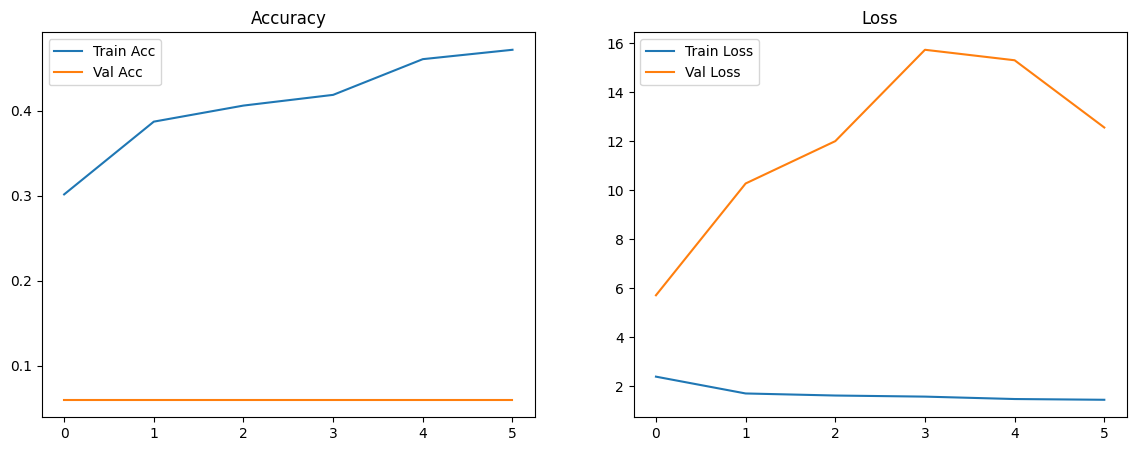

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 15s/step
Confusion matrix:
 [[ 0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0  3]]
Classification report:
                             precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.00      0.00      0.00        16
            dermatofibroma       0.00      0.00      0.00        16
                  melanoma       0.00      0.00      0.00        16
                     nevus       0.00      0.00      0.00        16
pigmented benign keratosis       0.00      0.00      0.00        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.00      0.00      0.00        16
           vascular lesion       0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


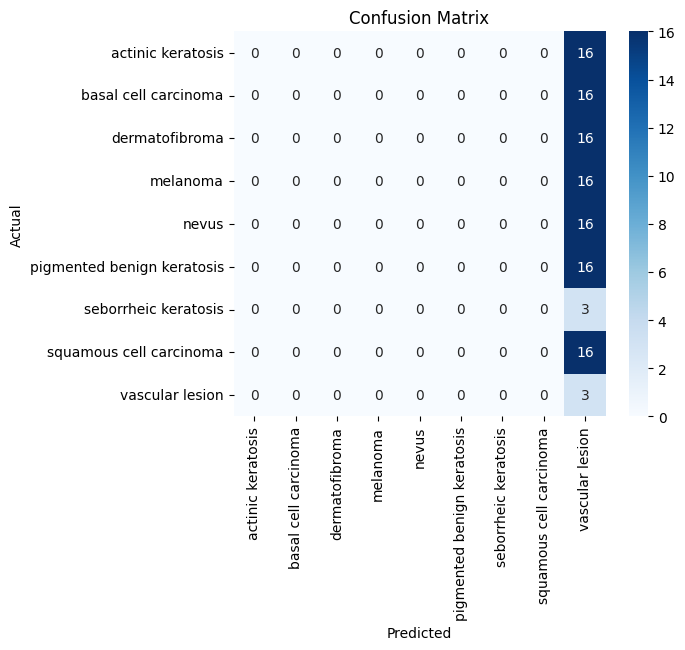

Reports saved to: /content/drive_fresh/MyDrive/skin_cancer_reports/


In [10]:
# 1⿡ Plot training curves
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

# 1⿢ Evaluate on test setg
test_generator.reset()
pred_prob = model.predict(test_generator)
pred = np.argmax(pred_prob, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, pred)
print("Confusion matrix:\n", cm)

cr = classification_report(y_true, pred, target_names=list(test_generator.class_indices.keys()))
print("Classification report:\n", cr)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 1⿣ Save classification report and confusion matrix
report_dir = "/content/drive_fresh/MyDrive/skin_cancer_reports/"
os.makedirs(report_dir, exist_ok=True)

with open(os.path.join(report_dir, "medium_cnn_skin_cancer_classification_report.txt"), "w") as f:
    f.write(cr)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.savefig(os.path.join(report_dir, "medium_cnn_skin_cancer_confusion_matrix.png"))
plt.close()

print("Reports saved to:", report_dir)
